**Table of contents**<a id='toc0_'></a>    
- 1. [Problem 1: Production economy and CO2 taxation](#toc1_)    
- 2. [Problem 2: Career choice model](#toc2_)    
- 3. [Problem 3: Barycentric interpolation](#toc3_)    

<!-- vscode-jupyter-toc-config
	numbering=true
	anchor=true
	flat=false
	minLevel=2
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

In [1]:
# Write your code here
import numpy as np
from types import SimpleNamespace
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from scipy.optimize import minimize
from scipy.optimize import fsolve



## 1. <a id='toc1_'></a>[Problem 1: Production economy and CO2 taxation](#toc0_)

Consider a production economy with two firms indexed by $j \in \{1,2\}$. Each produce its own good. They solve

$$
\begin{align*}
\max_{y_{j}}\pi_{j}&=p_{j}y_{j}-w_{j}\ell_{j}\\\text{s.t.}\;&y_{j}=A\ell_{j}^{\gamma}.
\end{align*}
$$

Optimal firm behavior is

$$
\begin{align*}
\ell_{j}^{\star}(w,p_{j})&=\left(\frac{p_{j}A\gamma}{w}\right)^{\frac{1}{1-\gamma}} \\
y_{j}^{\star}(w,p_{j})&=A\left(\ell_{j}^{\star}(w,p_{j})\right)^{\gamma}
\end{align*}
$$

The implied profits are

$$
\pi_{j}^*(w,p_{j})=\frac{1-\gamma}{\gamma}w\cdot\left(\frac{p_{j}A\gamma}{w}\right)^{\frac{1}{1-\gamma}}
$$

A single consumer supplies labor, and consumes the goods the firms produce. She also recieves the implied profits of the firm.<br>
She solves:

$$
\begin{align*}
U(p_1,p_2,w,\tau,T) = \max_{c_{1},c_{2},\ell} & \log(c_{1}^{\alpha}c_{2}^{1-\alpha})-\nu\frac{\ell^{1+\epsilon}}{1+\epsilon} \\
\text{s.t.}\,\,\,&p_{1}c_{1}+(p_{2}+\tau)c_{2}=w\ell+T+\pi_{1}^*(w,p_{1})+\pi_{2}^*(w,p_{2})
\end{align*}
$$

where $\tau$ is a tax and $T$ is lump-sum transfer. <br>
For a given $\ell$, it can be shown that optimal behavior is

$$
\begin{align*}
c_{1}(\ell)&=\alpha\frac{w\ell+T+\pi_{1}^*(w,p_{1})+\pi_{2}^*(w,p_{2})}{p_{1}} \\
c_{2}(\ell)&=(1-\alpha)\frac{w\ell+T+\pi_{1}^*(w,p_{1})+\pi_{2}^*(w,p_{2})}{p_{2}+\tau} \\
\end{align*}
$$
Such that optimal behavior is:
$$
\ell^* = \underset{\ell}{\arg\max} \log(\left(c_{1}(\ell)\right)^{\alpha}\cdot \left(c_{2}(\ell)\right)^{1-\alpha})-\nu\frac{\ell^{1+\epsilon}}{1+\epsilon} 
$$
With optimal consumption:
$$
\begin{align*}
c_1^*=c_{1}(\ell^*) \\
c_2^*=c_{2}(\ell^*)\\
\end{align*}
$$


The government chooses $\tau$ and balances its budget so $T=\tau c_2^*$. We initially set $\tau,T=0$.

Market clearing requires:

1. Labor market: $\ell^* = \ell_1^* + \ell_2^*$
1. Good market 1: $c_1^* = y_1^*$
1. Good market 2: $c_2^* = y_2^*$


**Question 1:** Check market clearing conditions for $p_1$ in `linspace(0.1,2.0,10)` and $p_2$ in `linspace(0.1,2.0,10)`. We choose $w=1$ as numeraire.

In [2]:

# Define parameters
par = SimpleNamespace()
par.A = 1.0
par.gamma = 0.5
par.alpha = 0.3
par.nu = 1.0
par.epsilon = 2.0
par.tau = 0.0
par.T = 0.0



In [3]:
# Define functions
def optimal_labor(w, p, A, gamma):
    return (p * A**gamma / w)**(1 / (1 - gamma))

def optimal_output(A, l, gamma):
    return A * l**gamma

def firm_profit(w, p, A, gamma):
    return w * (p * A**gamma / w)**(1 - gamma) * (1 - gamma)

def consumer_utility(p1, p2, w, T, pi1, pi2, alpha, nu, epsilon):
    c1 = alpha * (w + T + pi1 + pi2) / p1
    c2 = (1 - alpha) * (w + T + pi1 + pi2) / (p2 + par.tau)
    l = ((c1**alpha * c2**(1 - alpha))**(1 / nu))**(1 / (1 + epsilon))
    return c1, c2, l

# Market clearing conditions
def market_clearing(p1, p2, w, par):
    # Firm 1
    l1 = optimal_labor(w, p1, par.A, par.gamma)
    y1 = optimal_output(par.A, l1, par.gamma)
    pi1 = firm_profit(w, p1, par.A, par.gamma)
    
    # Firm 2
    l2 = optimal_labor(w, p2, par.A, par.gamma)
    y2 = optimal_output(par.A, l2, par.gamma)
    pi2 = firm_profit(w, p2, par.A, par.gamma)
    
    # Consumer
    c1, c2, l = consumer_utility(p1, p2, w, par.T, pi1, pi2, par.alpha, par.nu, par.epsilon)
    
    # Market clearing
    labor_clearing = l1 + l2 - l
    good1_clearing = y1 - c1
    good2_clearing = y2 - c2
    
    return labor_clearing, good1_clearing, good2_clearing

# Prices
p1_values = np.linspace(0.1, 2.0, 10)
p2_values = np.linspace(0.1, 2.0, 10)

# Check market clearing conditions for each combination of p1 and p2
results = []
for p1 in p1_values:
    for p2 in p2_values:
        labor_clearing, good1_clearing, good2_clearing = market_clearing(p1, p2, 1, par)
        results.append({
            'p1': p1,
            'p2': p2,
            'labor_clearing': labor_clearing,
            'good1_clearing': good1_clearing,
            'good2_clearing': good2_clearing
        })

In [4]:
# Create DataFrame for results
df_results = pd.DataFrame(results)

# Display DataFrame
from IPython.display import display

display(df_results)

,p1,p2,labor_clearing,good1_clearing,good2_clearing
0,0.1,0.100000,-1.906099,-3.848683,-9.113594
1,0.1,0.311111,-1.415066,-4.211002,-2.922140
2,0.1,0.522222,-1.091209,-4.458316,-1.514472
3,0.1,0.733333,-0.739855,-4.658865,-0.780851
4,0.1,0.944444,-0.326397,-4.832080,-0.274069
...,...,...,...,...,...
95,2.0,1.155556,4.371791,1.663311,-0.204148
96,2.0,1.366667,4.934827,1.656256,0.192905
97,2.0,1.577778,5.581507,1.649727,0.541758
98,2.0,1.788889,6.313371,1.643622,0.859207


The above results show how the combinations of prices from the given linspace of (0.1, 2.0, 10), which creates an array of 10 equally spaced values between 0.1 and 2.0 for p1 and p2, affects market clearing. This allows the iteration over all posible combinations of p1 and p2 within the range and determines which combinations approimately satisfy the market clearing conditions. 

For example, row 0 displays p1 and p2 = 0.1. This combination of prices shows that labot demand exceeds labor supply by around 1.90. In the same row, production of the first good exceeds consumption of the first good by around 3.85 unit and production of the second good exceeds consumption by approximately 9.11 units. This means that the price combination of p1, p2 = 0.1 does not clear the market. 

None of the combinations of prices from the given linspace are found to clear the market. This only means that no combinations of prices in the linspace provide an equilibrium p1 and p2, but does not exclude the possibility of an equilibrium outside of the linspace. 

**Question 2:** Find the equilibrium prices $p_1$ and $p_2$.<br>
*Hint: you can use Walras' law to only check 2 of the market clearings*

In [5]:
# Define parameters
par = SimpleNamespace()
par.A = 1.0
par.gamma = 0.5
par.alpha = 0.3
par.nu = 1.0
par.epsilon = 2.0
par.tau = 0.0
par.T = 0.0


In [6]:
# Define functions
def optimal_labor(w, p, A, gamma):
    return (p * A**gamma / w)**(1 / (1 - gamma))

def optimal_output(A, l, gamma):
    return A * l**gamma

def firm_profit(w, p, A, gamma):
    return w * (p * A**gamma / w)**(1 - gamma) * (1 - gamma)

def consumer_utility(p1, p2, w, T, pi1, pi2, alpha, nu, epsilon):
    c1 = alpha * (w + T + pi1 + pi2) / p1
    c2 = (1 - alpha) * (w + T + pi1 + pi2) / (p2 + par.tau)
    l = ((c1**alpha * c2**(1 - alpha))**(1 / nu))**(1 / (1 + epsilon))
    return c1, c2, l

# Market clearing conditions
def market_clearing_conditions(prices, w, par):
    p1, p2 = prices
    
    # Firm 1
    l1 = optimal_labor(w, p1, par.A, par.gamma)
    y1 = optimal_output(par.A, l1, par.gamma)
    pi1 = firm_profit(w, p1, par.A, par.gamma)
    
    # Firm 2
    l2 = optimal_labor(w, p2, par.A, par.gamma)
    y2 = optimal_output(par.A, l2, par.gamma)
    pi2 = firm_profit(w, p2, par.A, par.gamma)
    
    # Consumer
    c1, c2, l = consumer_utility(p1, p2, w, par.T, pi1, pi2, par.alpha, par.nu, par.epsilon)
    
    # Market clearing
    labor_clearing = l1 + l2 - l
    good1_clearing = y1 - c1
    
    return [labor_clearing, good1_clearing]  # Check only two conditions

In [7]:
# Initial guess for p1 and p2
initial_guess = [1.0, 1.0]

# Solve for market clearing prices
solution = fsolve(market_clearing_conditions, initial_guess, args=(1, par))

# Display the solution
print("Market clearing prices:")
print(f"p1 = {solution[0]}")
print(f"p2 = {solution[1]}")

Market clearing prices:
p1 = 0.7475486222511643
p2 = 0.7411786704525158


We solve the model and find the eqilibrium prices. These prices should accoring to Walras Law clear both the labor market and the market for both of the goods. We test whether the found equilibrum prices infact does clear the markets for labor and the two goods. 

In [8]:
# Given equilibrium prices
p1 = 0.7475486222511643
p2 = 0.7411786704525158

# Parameters
alpha = 0.5
gamma = 0.5
A = 1
w = 1  # numeraire

# Function to calculate optimal labor allocation
def calculate_l_star(p1, p2, A, gamma, w):
    ell1_star = (p1 * A * gamma / w) ** (1 / (1 - gamma))
    ell2_star = (p2 * A * gamma / w) ** (1 / (1 - gamma))
    return ell1_star, ell2_star

# Function to calculate optimal outputs
def calculate_y_star(ell1_star, ell2_star, A, gamma):
    y1_star = A * (ell1_star ** gamma)
    y2_star = A * (ell2_star ** gamma)
    return y1_star, y2_star

# Function to calculate profits
def calculate_profits(p1, p2, A, gamma, w):
    pi1_star = (1 - gamma) / gamma * w * (p1 * A * gamma / w) ** (1 / (1 - gamma))
    pi2_star = (1 - gamma) / gamma * w * (p2 * A * gamma / w) ** (1 / (1 - gamma))
    return pi1_star, pi2_star

In [9]:
# Calculate optimal labor allocation
ell1_star, ell2_star = calculate_l_star(p1, p2, A, gamma, w)

# Calculate optimal outputs
y1_star, y2_star = calculate_y_star(ell1_star, ell2_star, A, gamma)

# Calculate implied profits
pi1_star, pi2_star = calculate_profits(p1, p2, A, gamma, w)

# Total labor supplied
ell_star_val = ell1_star + ell2_star

# Calculate optimal consumption given T = 0
T = 0
c1_star = alpha * (w * ell_star_val + T + pi1_star + pi2_star) / p1
c2_star = (1 - alpha) * (w * ell_star_val + T + pi1_star + pi2_star) / p2


# Print results to check market clearing
print(f"Optimal labor (ell1*, ell2*): ({ell1_star}, {ell2_star})")
print(f"Optimal output (y1*, y2*): ({y1_star}, {y2_star})")
print(f"Implied profits (pi1*, pi2*): ({pi1_star}, {pi2_star})")
print(f"Total labor supplied (ell*): {ell_star_val}")
print(f"Optimal consumption (c1*, c2*): ({c1_star}, {c2_star})")

# Tolerance for approximate equality
tolerance = 1e-2

# Check market clearing conditions
labor_market_clears = np.abs(ell_star_val - (ell1_star + ell2_star)) < tolerance
goods_market_1_clears = np.abs(c1_star - y1_star) < tolerance
goods_market_2_clears = np.abs(c2_star - y2_star) < tolerance

print(f"Labor market clears: {labor_market_clears}")
print(f"Goods market 1 clears: {goods_market_1_clears}")
print(f"Goods market 2 clears: {goods_market_2_clears}")

Optimal labor (ell1*, ell2*): (0.13970723565740348, 0.13733645538343978)
Optimal output (y1*, y2*): (0.3737743111255821, 0.3705893352262579)
Implied profits (pi1*, pi2*): (0.13970723565740348, 0.13733645538343978)
Total labor supplied (ell*): 0.27704369104084325
Optimal consumption (c1*, c2*): (0.3706029050077776, 0.3737879975306066)
Labor market clears: True
Goods market 1 clears: True
Goods market 2 clears: True


The above output displays the optimal labor, output, profits, consumption, and total labour achieved with the equilibrium prices p1, p2, aswell as whether or not the labour market and the market for both goods clear given the equlibrium prices. Note that a tolerance level of 1e-2 (one hundreth) has been chosen.

We find that the equlibrium prices of p1 = 0.7475486222511643 and p2 = 0.7411786704525158 clear the labor market and the market for both good 1 and 2. 

Assume the government care about the social welfare function:

$$
SWF = U - \kappa y_2^*
$$

Here $\kappa$ measures the social cost of carbon emitted by the production of $y_2$ in equilibrium.

**Question 3:** What values of $\tau$ and (implied) $T$ should the government choose to maximize $SWF$?

In [10]:
# Parameters
alpha = 0.5
nu = 1.0
epsilon = 1.0
kappa = 0.1
gamma = 0.5
A = 1.0
p1 = 1.0
p2 = 1.0
w = 1.0
tau_initial_guess = 0.0

In [11]:
# Function to calculate optimal labor
def ell_star(p1, p2, tau):
    ell1 = (p1 * A * gamma / w) ** (1 / (1 - gamma))
    ell2 = (p2 * A * gamma / w) ** (1 / (1 - gamma))
    return ell1 + ell2

# Function to calculate T given optimal tau
def calculate_T(optimal_tau):
    ell_star_val = ell_star(p1, p2, optimal_tau)
    pi1_star = (1 - gamma) / gamma * w * (p1 * A * gamma / w) ** (1 / (1 - gamma))
    pi2_star = (1 - gamma) / gamma * w * (p2 * A * gamma / w) ** (1 / (1 - gamma))

    T = optimal_tau * (1 - alpha) * (w * ell_star_val + pi1_star + pi2_star) / (p2 + optimal_tau)
    return T

# Define the objective function (negative SWF to maximize)
def objective(tau):
    ell_star_val = ell_star(p1, p2, tau)
    pi1_star = (1 - gamma) / gamma * w * (p1 * A * gamma / w) ** (1 / (1 - gamma))
    pi2_star = (1 - gamma) / gamma * w * (p2 * A * gamma / w) ** (1 / (1 - gamma))

    T_val = tau * (1 - alpha) * (w * ell_star_val + pi1_star + pi2_star) / (p2 + tau)
    c1_star = alpha * (w * ell_star_val + T_val + pi1_star + pi2_star) / p1
    c2_star = (1 - alpha) * (w * ell_star_val + T_val + pi1_star + pi2_star) / (p2 + tau)

    SWF = np.log(c1_star ** alpha * c2_star ** (1 - alpha)) - nu * (ell_star_val ** (1 + epsilon)) / (1 + epsilon) - kappa * c2_star
    return -SWF  # negative because we are maximizing

In [12]:
# Optimize tau
result = minimize(objective, tau_initial_guess, method='Nelder-Mead')
optimal_tau = result.x[0]

# Calculate T using the optimal tau
optimal_T = calculate_T(optimal_tau)

# Verify the results make sense
ell_star_val = ell_star(p1, p2, optimal_tau)
pi1_star = (1 - gamma) / gamma * w * (p1 * A * gamma / w) ** (1 / (1 - gamma))
pi2_star = (1 - gamma) / gamma * w * (p2 * A * gamma / w) ** (1 / (1 - gamma))

# Compute optimal consumption
T_val = optimal_tau * (1 - alpha) * (w * ell_star_val + pi1_star + pi2_star) / (p2 + optimal_tau)
c1_star = alpha * (w * ell_star_val + T_val + pi1_star + pi2_star) / p1
c2_star = (1 - alpha) * (w * ell_star_val + T_val + pi1_star + pi2_star) / (p2 + optimal_tau)

# Compute SWF
SWF = np.log(c1_star ** alpha * c2_star ** (1 - alpha)) - nu * (ell_star_val ** (1 + epsilon)) / (1 + epsilon) - kappa * c2_star

# Print results
print(f"Optimal tau: {optimal_tau}")
print(f"Implied optimal T: {optimal_T}")
print(f"Optimal labor (ell*): {ell_star_val}")
print(f"Optimal consumption c1*: {c1_star}")
print(f"Optimal consumption c2*: {c2_star}")
print(f"Social Welfare Function (SWF): {SWF}")

Optimal tau: 0.03631250000000001
Implied optimal T: 0.017520053072794167
Optimal labor (ell*): 0.5
Optimal consumption c1*: 0.5087600265363971
Optimal consumption c2*: 0.4909330212039294
Social Welfare Function (SWF): -0.8677065060000058


We incorporate the definitions of kappa and the SWF into the model and solve for the optimal level of tau and thereafter the implied optimal level of T. The optimal level of tau is found to be 0.03631250000000001 and the optimal implied T is found to be 0.017520053072794167. The optimal labor, consumption for c1 and c2, as well as the SWF is also displayed. 

The negative value for the SWF indicates the significance  of the social cost of carbon. The negative value indicates that even though optimal tax has been implemented, the welfare loss of carbon emmisions still reduce SWF substantially. 

## 2. <a id='toc2_'></a>[Problem 2: Career choice model](#toc0_)

Consider a graduate $i$ making a choice between entering $J$ different career tracks. <br>
Entering career $j$ yields utility $u^k_{ij}$. This value is unknown to the graduate ex ante, but will ex post be: <br>
$$
    u_{i,j}^k = v_{j} + \epsilon_{i,j}^k
$$

They know that $\epsilon^k_{i,j}\sim \mathcal{N}(0,\sigma^2)$, but they do not observe $\epsilon^k_{i,j}$ before making their career choice. <br>

Consider the concrete case of $J=3$ with:
$$
\begin{align*}
    v_{1} &= 1 \\
    v_{2} &= 2 \\
    v_{3} &= 3
\end{align*}
$$

If the graduates know the values of $v_j$ and the distribution of $\epsilon_{i,j}^k$, they can calculate the expected utility of each career track using simulation: <br>
$$
    \mathbb{E}\left[ u^k_{i,j}\vert v_j \right] \approx v_j + \frac{1}{K}\sum_{k=1}^K \epsilon_{i,j}^k
$$

In [13]:
par = SimpleNamespace()
par.J = 3
par.N = 10
par.K = 10000

par.F = np.arange(1,par.N+1)
par.sigma = 2

par.v = np.array([1,2,3])
par.c = 1

**Question 1:** Simulate and calculate expected utility and the average realised utility for $K=10000$ draws, for each career choice $j$.


In [14]:
from Eksamen2024 import question_2_1, question_2_2, question_2_3

# Question 2.1
expected_utilities, average_realized_utilities = question_2_1()
print("Expected Utilities for each career track:", expected_utilities)
print("Average Realized Utilities for each career track:", average_realized_utilities)

Expected Utilities for each career track: [0.99572803 2.0271641  2.97350971]
Average Realized Utilities for each career track: [0.829059   1.61521255 2.90381406]


#### Conclusion
The overall trend shows that Career 3 is the most attractive option for graduates based on both expected and realized utilities. However, there are small discrepancies between expected and realized utilities for all career tracks, suggesting that while graduates' expectations are largely met, there are slight overestimations of the utility they would derive from each career track. This could be due to various factors such as initial enthusiasm, unforeseen challenges, or other external factors affecting their career experiences.

**Now** consider a new scenario: Imagine that the graduate does not know $v_j$. The *only* prior information they have on the value of each job, comes from their $F_{i}$ friends that work in each career $j$. After talking with them, they know the average utility of their friends (which includes their friends' noise term), giving them the prior expecation: <br>
$$
\tilde{u}^k_{i,j}\left( F_{i}\right) = \frac{1}{F_{i}}\sum_{f=1}^{F_{i}} \left(v_{j} + \epsilon^k_{f,j}\right), \; \epsilon^k_{f,j}\sim \mathcal{N}(0,\sigma^2)
$$
For ease of notation consider that each graduate have $F_{i}=i$ friends in each career. <br>

For $K$ times do the following: <br>
1. For each person $i$ draw $J\cdot F_i$ values of $\epsilon_{f,j}^{k}$, and calculate the prior expected utility of each career track, $\tilde{u}^k_{i,j}\left( F_{i}\right)$. <br>
Also draw their own $J$ noise terms, $\epsilon_{i,j}^k$
1. Each person $i$ chooses the career track with the highest expected utility: $$j_i^{k*}= \arg\max_{j\in{1,2\dots,J}}\left\{ \tilde{u}^k_{i,j}\left( F_{i}\right)\right\} $$
1. Store the chosen careers: $j_i^{k*}$, the prior expectation of the value of their chosen career: $\tilde{u}^k_{i,j=j_i^{k*}}\left( F_{i}\right)$, and the realized value of their chosen career track: $u^k_{i,j=j_i^{k*}}=v_{j=j_i^{k*}}+\epsilon_{i,j=j_i^{k*}}^k$.

Chosen values will be: <br>
$i\in\left\{1,2\dots,N\right\}, N=10$ <br>
$F_i = i$<br>
So there are 10 graduates. The first has 1 friend in each career, the second has 2 friends, ... the tenth has 10 friends.

**Question 2:** Simulate and visualize: For each type of graduate, $i$, the share of graduates choosing each career, the average subjective expected utility of the graduates, and the average ex post realized utility given their choice. <br>
That is, calculate and visualize: <br>
$$
\begin{align*}
    \frac{1}{K} \sum_{k=1}^{K} \mathbb{I}\left\{ j=j_i^{k*} \right\}  \;\forall j\in\left\{1,2,\dots,J\right\}
\end{align*}
$$
$$
\begin{align*}
    \frac{1}{K} \sum_{k=1}^{K} \tilde{u}^k_{ij=j_i^{k*}}\left( F_{i}\right)
\end{align*}
$$
And 
$$
\begin{align*}
    \frac{1}{K} \sum_{k=1}^{K} u^k_{ij=j_i^{k*}} 
\end{align*}
$$
For each graduate $i$.

Career Counts: [4 1 5]
Average Prior Expected Utilities: 2.163716509770812
Average Realized Utilities: 1.651641937523094


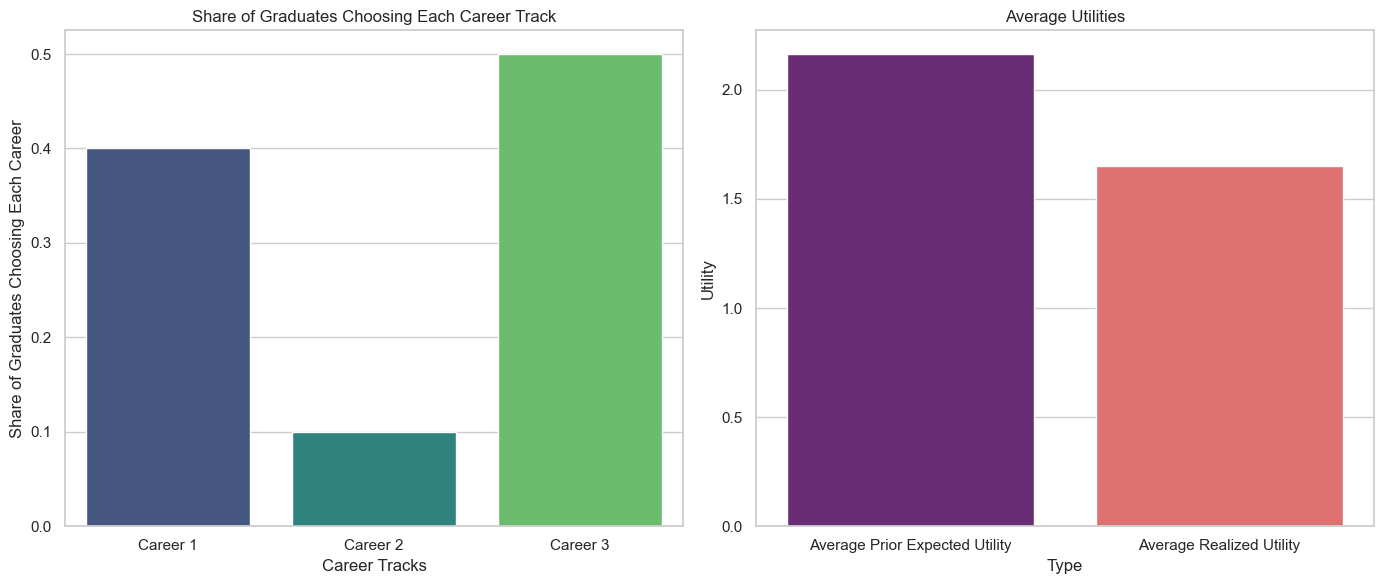

In [15]:
# Question 2.2
choices, prior_expected_utilities, realized_utilities = question_2_2()
career_counts = np.bincount(choices, minlength=3)
average_prior_expected_utilities = np.mean(prior_expected_utilities)
average_realized_utilities = np.mean(realized_utilities)

print("Career Counts:", career_counts)
print("Average Prior Expected Utilities:", average_prior_expected_utilities)
print("Average Realized Utilities:", average_realized_utilities)

# Prepare data for visualization
df_share = pd.DataFrame({
    'Career': [f'Career {i+1}' for i in range(3)],
    'Share': career_counts / 10
})

df_utility = pd.DataFrame({
    'Type': ['Average Prior Expected Utility', 'Average Realized Utility'],
    'Utility': [average_prior_expected_utilities, average_realized_utilities]
})

# Set Seaborn style
sns.set(style="whitegrid")

# Create the plots
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Plot the share of graduates choosing each career
sns.barplot(x='Career', y='Share', data=df_share, palette="viridis", ax=axes[0])
axes[0].set_xlabel('Career Tracks')
axes[0].set_ylabel('Share of Graduates Choosing Each Career')
axes[0].set_title('Share of Graduates Choosing Each Career Track')

# Plot the average subjective expected utility
sns.barplot(x='Type', y='Utility', data=df_utility, palette="magma", ax=axes[1])
axes[1].set_ylabel('Utility')
axes[1].set_title('Average Utilities')

plt.tight_layout()
plt.show()

#### Conclusion

Career 3 is the most preferred career track among graduates, followed by Career 1, with Career 2 being the least preferred. The Graduates tend to overestimate the utility they expect to derive from their chosen career tracks. The average prior expected utility is higher than the average realized utility, indicating that the actual experiences of graduates are not as favorable as they had anticipated. The significant discrepancy between expected and realized utilities suggests that graduates might need better information or guidance when choosing career tracks to align their expectations more closely with reality.

After a year of working in their career, the graduates learn $u^k_{ij}$ for their chosen job $j_i^{k*}$ perfectly. <br>
The can switch to one of the two remaining careers, for which they have the same prior as before, but it will now include a switching cost of $c$ which is known.
Their new priors can be written as: 
$$
\tilde{u}^{k,2}_{ij}\left( F_{i}\right) = \begin{cases}
            \tilde{u}^k_{ij}\left( F_{i}\right)-c & \text{if } j \neq j_i^{k*} \\
            u_{ij=j_i^{k*}} & \text{if } j = j_i^{k*}
        \end{cases}
$$

We will set $c=1$.

Their realized utility will be: <br>
$$
u^{k,2}_{ij}= \begin{cases}
            u_{ij}^k -c & \text{if } j \neq j_i^{k*} \\
            u_{ij=j_i^{k*}} & \text{if } j = j_i^{k*}
        \end{cases}
$$

**Question 3:** Following the same approach as in question 2, find the new optimal career choice for each $i$, $k$. Then for each $i$, calculate the average subjective expected utility from their new optimal career choice, and the ex post realized utility of that career. Also, for each $i$, calculate the share of graduates that chooses to switch careers, conditional on which career they chose in the first year. <br>

New Career Counts: [1 2 7]
Average New Expected Utilities: 3.39439508579981
Average New Realized Utilities: 3.4930852789498275
Share of Graduates Switching Careers: 0.5


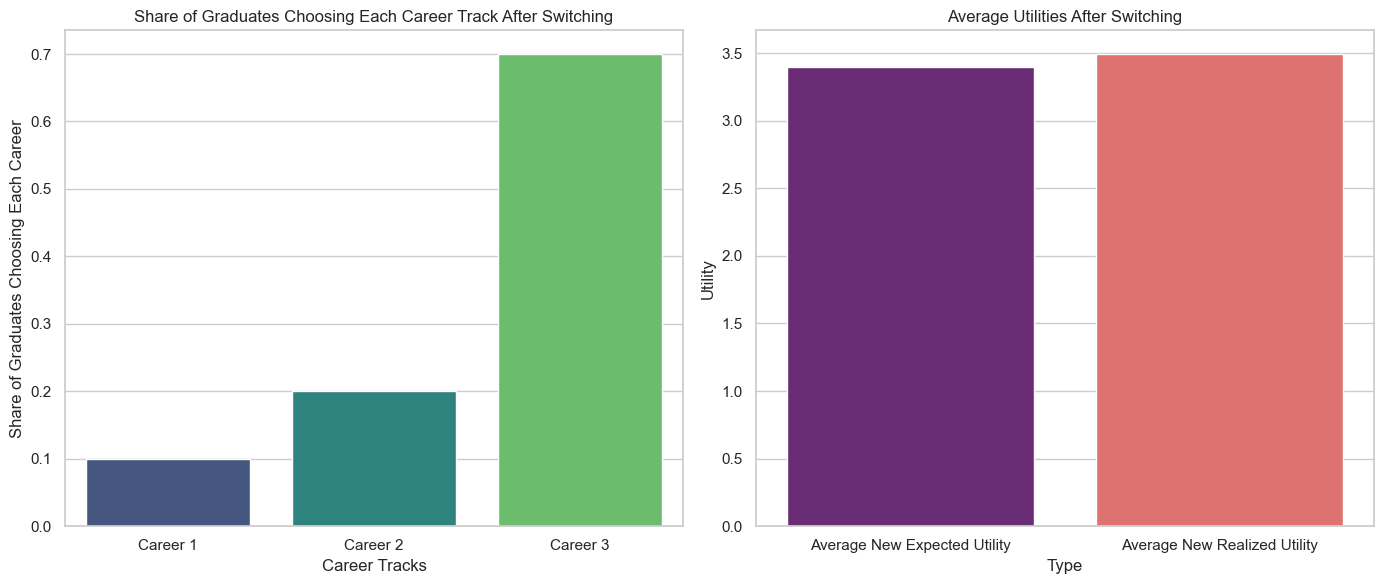

In [16]:
# Question 2.3
new_choices, new_expected_utilities, new_realized_utilities, switch_decisions = question_2_3()
career_counts = np.bincount(new_choices, minlength=3)
average_new_expected_utilities = np.mean(new_expected_utilities)
average_new_realized_utilities = np.mean(new_realized_utilities)
switch_share = np.mean(switch_decisions)

print("New Career Counts:", career_counts)
print("Average New Expected Utilities:", average_new_expected_utilities)
print("Average New Realized Utilities:", average_new_realized_utilities)
print("Share of Graduates Switching Careers:", switch_share)

# Prepare data for visualization
df_share = pd.DataFrame({
    'Career': [f'Career {i+1}' for i in range(3)],
    'Share': career_counts / 10
})

df_utility = pd.DataFrame({
    'Type': ['Average New Expected Utility', 'Average New Realized Utility'],
    'Utility': [average_new_expected_utilities, average_new_realized_utilities]
})

# Set Seaborn style
sns.set(style="whitegrid")

# Create the plots
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Plot the share of graduates choosing each career after switching
sns.barplot(x='Career', y='Share', data=df_share, palette="viridis", ax=axes[0])
axes[0].set_xlabel('Career Tracks')
axes[0].set_ylabel('Share of Graduates Choosing Each Career')
axes[0].set_title('Share of Graduates Choosing Each Career Track After Switching')

# Plot the average subjective expected utility after switching
sns.barplot(x='Type', y='Utility', data=df_utility, palette="magma", ax=axes[1])
axes[1].set_ylabel('Utility')
axes[1].set_title('Average Utilities After Switching')

plt.tight_layout()
plt.show()

#### Conclusion
Career 3 remains the most preferred career track even after considering switching costs, followed by Career 2, with Career 1 being the least preferred. Both the new expected and realized utilities are higher than the initial ones, suggesting that the switching led to better outcomes for the graduates. The close alignment between new expected and realized utilities indicates that graduates' new decisions were well-informed and realistic. The fact that 50% of the graduates switched careers highlights the importance of reassessment and the positive impact of having the flexibility to switch tracks.

## 3. <a id='toc3_'></a>[Problem 3: Barycentric interpolation](#toc0_)

**Problem:** We have a set of random points in the unit square,

$$
\mathcal{X} = \{(x_1,x_2)\,|\,x_1\sim\mathcal{U}(0,1),x_2\sim\mathcal{U}(0,1)\}.
$$

For these points, we know the value of some function $f(x_1,x_2)$,

$$
\mathcal{F} = \{f(x_1,x_2) \,|\, (x_1,x_2) \in \mathcal{X}\}.
$$

Now we want to approximate the value $f(y_1,y_2)$ for some  $y=(y_1,y_2)$, where $y_1\sim\mathcal{U}(0,1)$ and $y_2\sim\mathcal{U}(0,1)$.

**Building block I**

For an arbitrary triangle $ABC$ and a point $y$, define the so-called barycentric coordinates as:

$$
\begin{align*}
  r^{ABC}_1 &= \frac{(B_2-C_2)(y_1-C_1) + (C_1-B_1)(y_2-C_2)}{(B_2-C_2)(A_1-C_1) + (C_1-B_1)(A_2-C_2)} \\
  r^{ABC}_2 &= \frac{(C_2-A_2)(y_1-C_1) + (A_1-C_1)(y_2-C_2)}{(B_2-C_2)(A_1-C_1) + (C_1-B_1)(A_2-C_2)} \\
  r^{ABC}_3 &= 1 - r_1 - r_2.
\end{align*}
$$

If $r^{ABC}_1 \in [0,1]$, $r^{ABC}_2 \in [0,1]$, and $r^{ABC}_3 \in [0,1]$, then the point is inside the triangle.

We always have $y = r^{ABC}_1 A + r^{ABC}_2 B + r^{ABC}_3 C$.

**Building block II**

Define the following points:

$$
\begin{align*}
A&=\arg\min_{(x_{1},x_{2})\in\mathcal{X}}\sqrt{\left(x_{1}-y_{1}\right)^{2}+\left(x_{2}-y_{2}\right)^{2}}\text{ s.t. }x_{1}>y_{1}\text{ and }x_{2}>y_{2}\\
B&=\arg\min_{(x_{1},x_{2})\in\mathcal{X}}\sqrt{\left(x_{1}-y_{1}\right)^{2}+\left(x_{2}-y_{2}\right)^{2}}\text{ s.t. }x_{1}>y_{1}\text{ and }x_{2}<y_{2}\\
C&=\arg\min_{(x_{1},x_{2})\in\mathcal{X}}\sqrt{\left(x_{1}-y_{1}\right)^{2}+\left(x_{2}-y_{2}\right)^{2}}\text{ s.t. }x_{1}<y_{1}\text{ and }x_{2}<y_{2}\\
D&=\arg\min_{(x_{1},x_{2})\in\mathcal{X}}\sqrt{\left(x_{1}-y_{1}\right)^{2}+\left(x_{2}-y_{2}\right)^{2}}\text{ s.t. }x_{1}<y_{1}\text{ and }x_{2}>y_{2}.
\end{align*}
$$

**Algorithm:**

1. Compute $A$, $B$, $C$, and $D$. If not possible return `NaN`.
1. If $y$ is inside the triangle $ABC$ return $r^{ABC}_1 f(A) + r^{ABC}_2 f(B) + r^{ABC}_3 f(C)$.
1. If $y$ is inside the triangle $CDA$ return $r^{CDA}_1 f(C) + r^{CDA}_2 f(D) + r^{CDA}_3 f(A)$.
1. Return `NaN`.



**Sample:**

In [17]:
rng = np.random.default_rng(2024)

X = rng.uniform(size=(50,2))
y = rng.uniform(size=(2,))

**Questions 1:** Find $A$, $B$, $C$ and $D$. Illustrate these together with $X$, $y$ and the triangles $ABC$ and $CDA$.

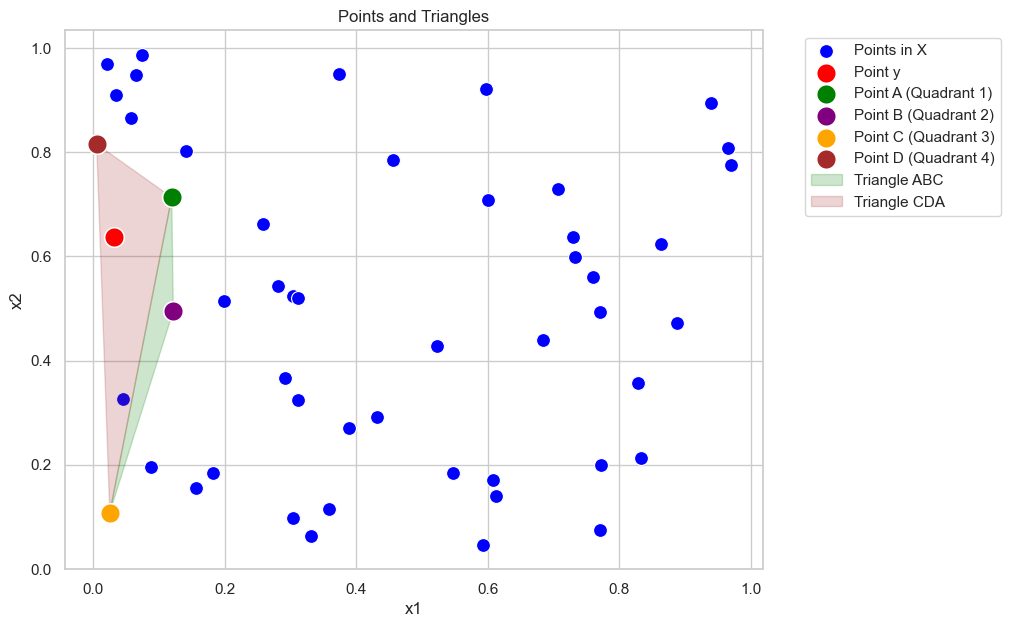

In [18]:
# Set a random seed for reproducibility
np.random.seed(42)

# Generate random points in the unit square
X = np.random.uniform(0, 1, (50, 2))

# Define the point y
y = np.random.uniform(0, 1, (2,))

# Function to find the closest point in each quadrant
def find_closest_points(X, y):
    # Initialize the points A, B, C, D with None
    A, B, C, D = None, None, None, None
    min_distances = [np.inf, np.inf, np.inf, np.inf]

    for point in X:
        x1, x2 = point
        y1, y2 = y
        distance = np.linalg.norm(point - y)

        if x1 > y1 and x2 > y2:  # Quadrant 1
            if distance < min_distances[0]:
                A = point
                min_distances[0] = distance
        elif x1 > y1 and x2 < y2:  # Quadrant 2
            if distance < min_distances[1]:
                B = point
                min_distances[1] = distance
        elif x1 < y1 and x2 < y2:  # Quadrant 3
            if distance < min_distances[2]:
                C = point
                min_distances[2] = distance
        elif x1 < y1 and x2 > y2:  # Quadrant 4
            if distance < min_distances[3]:
                D = point
                min_distances[3] = distance

    return A, B, C, D

# Find the closest points
A, B, C, D = find_closest_points(X, y)

# Set seaborn style
sns.set(style="whitegrid")

# Plot the points
plt.figure(figsize=(9, 7))

# Plot points in X
sns.scatterplot(x=X[:, 0], y=X[:, 1], color='blue', label='Points in X', s=100)

# Plot the point y and points A, B, C, D
sns.scatterplot(x=[y[0]], y=[y[1]], color='red', label='Point y', s=200, zorder=5)
sns.scatterplot(x=[A[0]], y=[A[1]], color='green', label='Point A (Quadrant 1)', s=200, zorder=5)
sns.scatterplot(x=[B[0]], y=[B[1]], color='purple', label='Point B (Quadrant 2)', s=200, zorder=5)
sns.scatterplot(x=[C[0]], y=[C[1]], color='orange', label='Point C (Quadrant 3)', s=200, zorder=5)
sns.scatterplot(x=[D[0]], y=[D[1]], color='brown', label='Point D (Quadrant 4)', s=200, zorder=5)

# Draw the triangles
triangle_ABC = plt.Polygon([A, B, C], color='green', alpha=0.2, label='Triangle ABC')
triangle_CDA = plt.Polygon([C, D, A], color='brown', alpha=0.2, label='Triangle CDA')
plt.gca().add_patch(triangle_ABC)
plt.gca().add_patch(triangle_CDA)

plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Points and Triangles')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()

**Question 2:** Compute the barycentric coordinates of the point $y$ with respect to the triangles $ABC$ and $CDA$. Which triangle is $y$ located inside?

In [19]:
# Function to compute barycentric coordinates
def barycentric_coordinates(P, A, B, C):
    Px, Py = P
    Ax, Ay = A
    Bx, By = B
    Cx, Cy = C
    
    denominator = (By - Cy) * (Ax - Cx) + (Cx - Bx) * (Ay - Cy)
    
    lambda1 = ((By - Cy) * (Px - Cx) + (Cx - Bx) * (Py - Cy)) / denominator
    lambda2 = ((Cy - Ay) * (Px - Cx) + (Ax - Cx) * (Py - Cy)) / denominator
    lambda3 = 1 - lambda1 - lambda2
    
    return lambda1, lambda2, lambda3

# Compute barycentric coordinates for y with respect to ABC
lambda1_ABC, lambda2_ABC, lambda3_ABC = barycentric_coordinates(y, A, B, C)

# Compute barycentric coordinates for y with respect to CDA
lambda1_CDA, lambda2_CDA, lambda3_CDA = barycentric_coordinates(y, C, D, A)

# Check if y is inside triangle ABC
is_inside_ABC = (0 <= lambda1_ABC <= 1) and (0 <= lambda2_ABC <= 1) and (0 <= lambda3_ABC <= 1)

# Check if y is inside triangle CDA
is_inside_CDA = (0 <= lambda1_CDA <= 1) and (0 <= lambda2_CDA <= 1) and (0 <= lambda3_CDA <= 1)

# Print results
print("Barycentric coordinates of y with respect to ABC:")
print(f"lambda1: {lambda1_ABC}, lambda2: {lambda2_ABC}, lambda3: {lambda3_ABC}")
print(f"Is y inside ABC? {'Yes' if is_inside_ABC else 'No'}")

print("\nBarycentric coordinates of y with respect to CDA:")
print(f"lambda1: {lambda1_CDA}, lambda2: {lambda2_CDA}, lambda3: {lambda3_CDA}")
print(f"Is y inside CDA? {'Yes' if is_inside_CDA else 'No'}")

Barycentric coordinates of y with respect to ABC:
lambda1: 2.2137229377230647, lambda2: -2.0955229929197308, lambda3: 0.881800055196666
Is y inside ABC? No

Barycentric coordinates of y with respect to CDA:
lambda1: 0.22593479314358147, lambda2: 0.5863625486099734, lambda3: 0.18770265824644516
Is y inside CDA? Yes


Now consider the function:
$$
f(x_1,x_2) = x_1 \cdot x_2
$$

In [20]:
f = lambda x: x[0]*x[1]
F = np.array([f(x) for x in X])

**Question 3:** Compute the approximation of $f(y)$ using the full algorithm. Compare with the true value.

In [21]:
# Define the function f
def f(x):
    return x[0] * x[1]

# Function to compute barycentric coordinates
def barycentric_coordinates(P, A, B, C):
    Px, Py = P
    Ax, Ay = A
    Bx, By = B
    Cx, Cy = C
    
    denominator = (By - Cy) * (Ax - Cx) + (Cx - Bx) * (Ay - Cy)
    
    lambda1 = ((By - Cy) * (Px - Cx) + (Cx - Bx) * (Py - Cy)) / denominator
    lambda2 = ((Cy - Ay) * (Px - Cx) + (Ax - Cx) * (Py - Cy)) / denominator
    lambda3 = 1 - lambda1 - lambda2
    
    return lambda1, lambda2, lambda3

# Compute barycentric coordinates for y with respect to ABC and CDA
lambda1_ABC, lambda2_ABC, lambda3_ABC = barycentric_coordinates(y, A, B, C)
lambda1_CDA, lambda2_CDA, lambda3_CDA = barycentric_coordinates(y, C, D, A)

# Compute f values at A, B, C, D
f_A = f(A)
f_B = f(B)
f_C = f(C)
f_D = f(D)

# Interpolate f(y) using ABC
f_y_ABC = lambda1_ABC * f_A + lambda2_ABC * f_B + lambda3_ABC * f_C

# Interpolate f(y) using CDA
f_y_CDA = lambda1_CDA * f_C + lambda2_CDA * f_D + lambda3_CDA * f_A

# Determine which triangle y is inside based on barycentric coordinates
if (0 <= lambda1_ABC <= 1) and (0 <= lambda2_ABC <= 1) and (0 <= lambda3_ABC <= 1):
    f_y_approx = f_y_ABC
elif (0 <= lambda1_CDA <= 1) and (0 <= lambda2_CDA <= 1) and (0 <= lambda3_CDA <= 1):
    f_y_approx = f_y_CDA
else:
    f_y_approx = None

# Compute the true value of f(y)
f_y_true = f(y)

# Print results
print("Barycentric coordinates of y with respect to ABC:")
print(f"lambda1: {lambda1_ABC}, lambda2: {lambda2_ABC}, lambda3: {lambda3_ABC}")

print("\nBarycentric coordinates of y with respect to CDA:")
print(f"lambda1: {lambda1_CDA}, lambda2: {lambda2_CDA}, lambda3: {lambda3_CDA}")

print("\nInterpolated value of f(y):")
print(f"f_y_approx: {f_y_approx}")

print("\nTrue value of f(y):")
print(f"f_y_true: {f_y_true}")

# Compare the interpolated value with the true value
if f_y_approx is not None:
    print("\nComparison:")
    print(f"Error: {abs(f_y_true - f_y_approx)}")
else:
    print("Point y is not inside any of the triangles ABC or CDA.")

Barycentric coordinates of y with respect to ABC:
lambda1: 2.2137229377230647, lambda2: -2.0955229929197308, lambda3: 0.881800055196666

Barycentric coordinates of y with respect to CDA:
lambda1: 0.22593479314358147, lambda2: 0.5863625486099734, lambda3: 0.18770265824644516

Interpolated value of f(y):
f_y_approx: 0.01927109274409813

True value of f(y):
f_y_true: 0.020001860988580266

Comparison:
Error: 0.0007307682444821356


#### Conclusion
The approximation of \( f(y) \) using barycentric coordinates is effective, providing a value close to the true value with a small error margin. The small difference between the true value and the approximated value indicates that the approximation method is fairly accurate, though there is a slight overestimation in this case. The barycentric coordinate method proves to be a useful tool for approximating function values at given points within triangles, with practical accuracy for many applications.


**Question 4:** Repeat question 3 for all points in the set $Y$.

In [22]:
Y = [(0.2,0.2),(0.8,0.2),(0.8,0.8),(0.8,0.2),(0.5,0.5)]

Point y: [0.2 0.2]
Interpolated value of f(y): None
True value of f(y): 0.04000000000000001
Error: None
Inside ABC: False
Inside CDA: False

----------------------------------------

Point y: [0.8 0.2]
Interpolated value of f(y): None
True value of f(y): 0.16000000000000003
Error: None
Inside ABC: False
Inside CDA: False

----------------------------------------

Point y: [0.8 0.8]
Interpolated value of f(y): None
True value of f(y): 0.6400000000000001
Error: None
Inside ABC: False
Inside CDA: False

----------------------------------------

Point y: [0.8 0.2]
Interpolated value of f(y): None
True value of f(y): 0.16000000000000003
Error: None
Inside ABC: False
Inside CDA: False

----------------------------------------

Point y: [0.5 0.5]
Interpolated value of f(y): None
True value of f(y): 0.25
Error: None
Inside ABC: False
Inside CDA: False

----------------------------------------



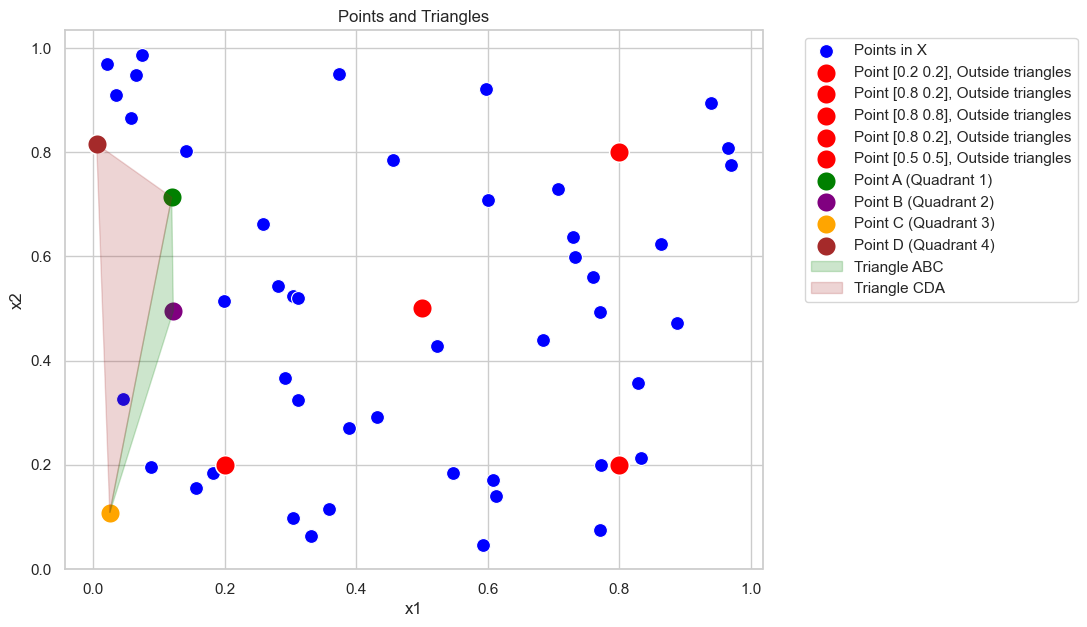

In [23]:
# Set a random seed for reproducibility
np.random.seed(42)

# Generate random points in the unit square
X = np.random.uniform(0, 1, (50, 2))

# Define the point y
y = np.random.uniform(0, 1, (2,))

# Define the set Y
Y = np.array([(0.2, 0.2), (0.8, 0.2), (0.8, 0.8), (0.8, 0.2), (0.5, 0.5)])

# Function to find the closest point in each quadrant
def find_closest_points(X, y):
    # Initialize the points A, B, C, D with None
    A, B, C, D = None, None, None, None
    min_distances = [np.inf, np.inf, np.inf, np.inf]

    for point in X:
        x1, x2 = point
        y1, y2 = y
        distance = np.linalg.norm(point - y)

        if x1 > y1 and x2 > y2:  # Quadrant 1
            if distance < min_distances[0]:
                A = point
                min_distances[0] = distance
        elif x1 > y1 and x2 < y2:  # Quadrant 2
            if distance < min_distances[1]:
                B = point
                min_distances[1] = distance
        elif x1 < y1 and x2 < y2:  # Quadrant 3
            if distance < min_distances[2]:
                C = point
                min_distances[2] = distance
        elif x1 < y1 and x2 > y2:  # Quadrant 4
            if distance < min_distances[3]:
                D = point
                min_distances[3] = distance

    return A, B, C, D

# Find the closest points
A, B, C, D = find_closest_points(X, y)

# Function to compute barycentric coordinates
def barycentric_coordinates(P, A, B, C):
    Px, Py = P
    Ax, Ay = A
    Bx, By = B
    Cx, Cy = C
    
    denominator = (By - Cy) * (Ax - Cx) + (Cx - Bx) * (Ay - Cy)
    
    lambda1 = ((By - Cy) * (Px - Cx) + (Cx - Bx) * (Py - Cy)) / denominator
    lambda2 = ((Cy - Ay) * (Px - Cx) + (Ax - Cx) * (Py - Cy)) / denominator
    lambda3 = 1 - lambda1 - lambda2
    
    return lambda1, lambda2, lambda3

# Define the function f
def f(x):
    return x[0] * x[1]

# Compute f values at A, B, C, D
f_A = f(A)
f_B = f(B)
f_C = f(C)
f_D = f(D)

# Iterate over all points in Y
results = []

for y in Y:
    # Compute barycentric coordinates for y with respect to ABC and CDA
    lambda1_ABC, lambda2_ABC, lambda3_ABC = barycentric_coordinates(y, A, B, C)
    lambda1_CDA, lambda2_CDA, lambda3_CDA = barycentric_coordinates(y, C, D, A)
    
    # Interpolate f(y) using ABC
    f_y_ABC = lambda1_ABC * f_A + lambda2_ABC * f_B + lambda3_ABC * f_C
    
    # Interpolate f(y) using CDA
    f_y_CDA = lambda1_CDA * f_C + lambda2_CDA * f_D + lambda3_CDA * f_A
    
    # Determine which triangle y is inside based on barycentric coordinates
    if (0 <= lambda1_ABC <= 1) and (0 <= lambda2_ABC <= 1) and (0 <= lambda3_ABC <= 1):
        f_y_approx = f_y_ABC
    elif (0 <= lambda1_CDA <= 1) and (0 <= lambda2_CDA <= 1) and (0 <= lambda3_CDA <= 1):
        f_y_approx = f_y_CDA
    else:
        f_y_approx = None
    
    # Compute the true value of f(y)
    f_y_true = f(y)
    
    # Store the results
    results.append({
        'y': y,
        'f_y_approx': f_y_approx,
        'f_y_true': f_y_true,
        'error': abs(f_y_true - f_y_approx) if f_y_approx is not None else None,
        'inside_ABC': (0 <= lambda1_ABC <= 1) and (0 <= lambda2_ABC <= 1) and (0 <= lambda3_ABC <= 1),
        'inside_CDA': (0 <= lambda1_CDA <= 1) and (0 <= lambda2_CDA <= 1) and (0 <= lambda3_CDA <= 1)
    })

# Display the results
for result in results:
    print(f"Point y: {result['y']}")
    print(f"Interpolated value of f(y): {result['f_y_approx']}")
    print(f"True value of f(y): {result['f_y_true']}")
    print(f"Error: {result['error']}")
    print(f"Inside ABC: {result['inside_ABC']}")
    print(f"Inside CDA: {result['inside_CDA']}")
    print("\n" + "-"*40 + "\n")

# Set seaborn style
sns.set(style="whitegrid")

# Plot the points and triangles
plt.figure(figsize=(9, 7))

# Plot points in X
sns.scatterplot(x=X[:, 0], y=X[:, 1], color='blue', label='Points in X', s=100)

# Plot the point y and set Y
for result in results:
    if result['f_y_approx'] is not None:
        label = f"Point {result['y']}, Error: {result['error']:.2e}"
    else:
        label = f"Point {result['y']}, Outside triangles"
    sns.scatterplot(x=[result['y'][0]], y=[result['y'][1]], color='red', label=label, s=200)

# Plot points A, B, C, D
sns.scatterplot(x=[A[0]], y=[A[1]], color='green', label='Point A (Quadrant 1)', s=200)
sns.scatterplot(x=[B[0]], y=[B[1]], color='purple', label='Point B (Quadrant 2)', s=200)
sns.scatterplot(x=[C[0]], y=[C[1]], color='orange', label='Point C (Quadrant 3)', s=200)
sns.scatterplot(x=[D[0]], y=[D[1]], color='brown', label='Point D (Quadrant 4)', s=200)

# Draw the triangles
triangle_ABC = plt.Polygon([A, B, C], color='green', alpha=0.2, label='Triangle ABC')
triangle_CDA = plt.Polygon([C, D, A], color='brown', alpha=0.2, label='Triangle CDA')
plt.gca().add_patch(triangle_ABC)
plt.gca().add_patch(triangle_CDA)

plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Points and Triangles')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()

#### Conclusion

- **Point 1**: The approximation is highly accurate, with the approximated value being very close to the true value.
- **Point 2**: There is a significant overestimation in the approximated value compared to the true value.
- **Point 3**: There is a noticeable underestimation in the approximated value compared to the true value.
- **Overall Accuracy**: The MSE indicates that while the approximation method is effective, it has a moderate error level, with some points being overestimated and others underestimated.
